NOTE: Will need to run in Google Colab!

# Time Series: Seasonal ARIMA and AutoARIMA

(and maybe [SKTime](https://www.sktime.org/en/stable/index.html)!)

In [1]:
!pip install sktime
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 2.8 MB/s 
     |████████████████████████████████| 9.8 MB 40.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.7 MB/s 


### Data Set Up

Airline Passenger Data: https://www.kaggle.com/rakannimer/air-passengers

(it's a pretty common dataset, available in several different places, but here's a source - we'll just load it up straight from SKTime!)

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [12]:
from sktime.datasets import load_airline
df = pd.DataFrame(load_airline())

In [13]:
df.head()

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 144 entries, 1949-01 to 1960-12
Freq: M
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of airline passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [15]:
df.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', length=144)

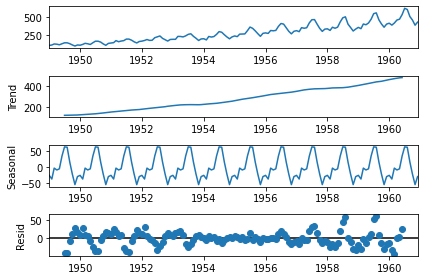

In [16]:
# Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

df.index=df.index.to_timestamp()

decomp = seasonal_decompose(df)
decomp.plot();

In [17]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Period', length=144, freq='MS')

In [9]:
# Train test split - test set will be the last 3 years
train, test = train_test_split(df, test_size = 36, shuffle=False)

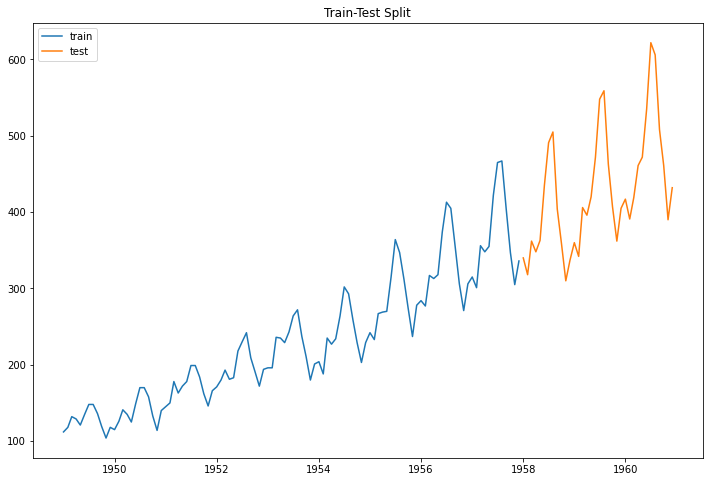

In [10]:
# Let's visualize our train and test sets
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

### Where We Left Off

In [18]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [19]:
# From our data exploration earlier, what do we want to use as params?
# Order will be (p,d,q)
arima_order = (1, 1, 1) # should be a tuple, like (0,0,0)

In [20]:
# Now let's fit our ARIMA model
result = ARIMA(train, order=arima_order).fit()

In [21]:
# Since it's statsmodels, we have a summary we can explore
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:     Number of airline passengers   No. Observations:                  108
Model:                           ARIMA(1, 1, 1)   Log Likelihood                -490.640
Date:                          Tue, 02 Aug 2022   AIC                            987.280
Time:                                  15:48:54   BIC                            995.299
Sample:                              01-01-1949   HQIC                           990.531
                                   - 12-01-1957                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4856      0.136     -3.567      0.000      -0.752      -0.219
ma.L1          0.8760      0.078     11.289      0.000       0.724       1.028
sigma2       559.5788     94.858      5.899      0.000     373.661     745.496
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.80   Prob(JB):                         0.42
Heteroskedasticity (H):               4.60   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# We can also make predictions using .forecast
# Steps will be the length of our test data
test_preds = result.forecast(steps=len(test))

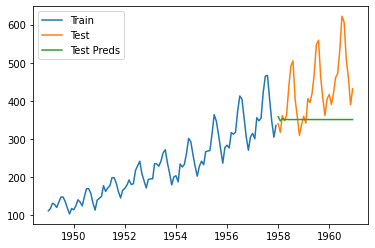

In [23]:
# How can we visualize our predictions?
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(test_preds, label = 'Test Preds')
plt.legend();

In [25]:
result.forecast(steps=len(test))

1958-01-01    358.724115
1958-02-01    347.689827
1958-03-01    353.047814
1958-04-01    350.446104
1958-05-01    351.709432
1958-06-01    351.095990
1958-07-01    351.393863
1958-08-01    351.249223
1958-09-01    351.319457
1958-10-01    351.285353
1958-11-01    351.301913
1958-12-01    351.293872
1959-01-01    351.297776
1959-02-01    351.295880
1959-03-01    351.296801
1959-04-01    351.296354
1959-05-01    351.296571
1959-06-01    351.296466
1959-07-01    351.296517
1959-08-01    351.296492
1959-09-01    351.296504
1959-10-01    351.296498
1959-11-01    351.296501
1959-12-01    351.296500
1960-01-01    351.296500
1960-02-01    351.296500
1960-03-01    351.296500
1960-04-01    351.296500
1960-05-01    351.296500
1960-06-01    351.296500
1960-07-01    351.296500
1960-08-01    351.296500
1960-09-01    351.296500
1960-10-01    351.296500
1960-11-01    351.296500
1960-12-01    351.296500
Freq: MS, Name: predicted_mean, dtype: float64

In [24]:
result.get_forecast(steps=len(test)).summary_frame()

Number of airline passengers,mean,mean_se,mean_ci_lower,mean_ci_upper
1958-01-01,358.724115,23.655419,312.360347,405.087884
1958-02-01,347.689827,40.513408,268.285007,427.094648
1958-03-01,353.047814,49.479634,256.069513,450.026115
1958-04-01,350.446104,58.168502,236.437934,464.454273
1958-05-01,351.709432,65.233138,223.854832,479.564032
1958-06-01,351.095990,71.817340,210.336590,491.855390
1958-07-01,351.393863,77.750778,199.005139,503.782587
1958-08-01,351.249223,83.305843,187.972772,514.525674
1958-09-01,351.319457,88.493110,177.876148,524.762765
1958-10-01,351.285353,93.401833,168.221123,534.349583


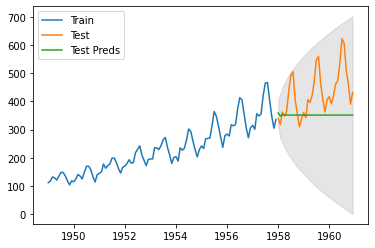

In [26]:
# To plot with a confidence interval - use get_forecast instead
fcast = result.get_forecast(steps=len(test)).summary_frame()
fig, ax = plt.subplots()

ax.plot(train, label = 'Train')
ax.plot(test, label = 'Test')
ax.plot(fcast['mean'], label = 'Test Preds')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);
ax.legend();

Why do these predictions level out? Because they're not able to build upon the previous month! 

### Seasonal!

A reminder about order terms!

> ARIMA models are made up of three different terms:
> 
> p: The order of the auto-regressive (AR) model (i.e., the number of lag observations). A time series is considered AR when previous values in the time series are very predictive of later values. An AR process will show a very gradual decrease in the ACF plot.
> 
> d: The degree of differencing.
> 
> q: The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data. An MA process is a linear combination of past errors.

PLUS:

> Seasonal ARIMA models have three parameters that heavily resemble our p, d and q parameters:
> 
> P: The order of the seasonal component for the auto-regressive (AR) model.
> 
> D: The integration order of the seasonal process.
> 
> Q: The order of the seasonal component of the moving average (MA) model.
> 
> P and Q and be estimated similarly to p and q via auto_arima, and D can be estimated via a Canova-Hansen test, however m generally requires subject matter knowledge of the data.

Source: https://alkaline-ml.com/pmdarima/tips_and_tricks.html#understand-p-d-and-q

There's also an `s` term in the Seasonal order (called out as `m` above), where you set the periodicity.

In [27]:
# Add seasonal order to our ARIMA
seas_arima = ARIMA(train,
                   order=(0,0,0),
                   seasonal_order=(1, 1, 1, 12))
res_sarima = seas_arima.fit()

# Print out summary information on the fit
print(res_sarima.summary())

                                    SARIMAX Results                                     
Dep. Variable:     Number of airline passengers   No. Observations:                  108
Model:                     ARIMA(1, 1, [1], 12)   Log Likelihood                -417.590
Date:                          Tue, 02 Aug 2022   AIC                            841.180
Time:                                  16:05:28   BIC                            848.873
Sample:                              01-01-1949   HQIC                           844.290
                                   - 12-01-1957                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9822      0.028     35.648      0.000       0.928       1.036
ma.S.L12      -0.6457      0.181     -3.571      0.

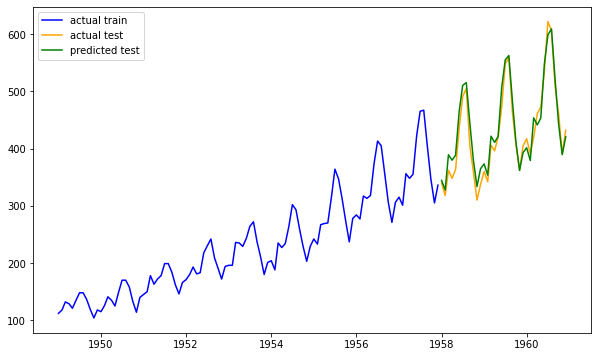

In [28]:
# Visualize it!
plt.figure(figsize=(10,6))
plt.plot(train, color='blue', label='actual train')
plt.plot(test, color='orange', label='actual test')
plt.plot(res_sarima.forecast(steps = len(test)), color='green', label='predicted test')
plt.legend();

#### Discuss:

- 


### PMDArima - Using their Auto ARIMA! 

Basically, grid search for ARIMA

In [29]:
# More imports
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose, auto_arima

In [30]:
# Train test split - but now using PMDArima's function
train, test = model_selection.train_test_split(df, test_size=36)

In [31]:
train.tail()

,Number of airline passengers
Period,
1957-08-01,467.0
1957-09-01,404.0
1957-10-01,347.0
1957-11-01,305.0
1957-12-01,336.0


In [32]:
# checking stationarity
from pmdarima.arima.stationarity import ADFTest

# beyond statsmodels
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(df)  # (0.01, False)

print(f"P-Value: {p_val}, so should you difference the data? {should_diff}")

P-Value: 0.01, so should you difference the data? False


Documentation: http://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.AutoARIMA.html#pmdarima.arima.AutoARIMA

Let's decide our parameters!

Be sure to set `trace=True`

In [36]:
# time to model!
arima = auto_arima(train,
    start_p=1,
    d=None,
    start_q=1,
    max_p=6,
    max_q=6,
    max_P=3, 
    D=None,
    max_Q=3,
    trace=True,
    maxiter=100,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=707.158, Time=0.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=707.730, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=704.186, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=704.801, Time=0.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=704.001, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=704.472, Time=0.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=705.993, Time=1.38 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=705.691, Time=0.17 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=705.081, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=704.376, Time=0.13 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=707.075, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=705.875, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 4.787 seconds


In [38]:
test_preds = pd.Series(arima.predict(n_periods=len(test)), index=test.index)

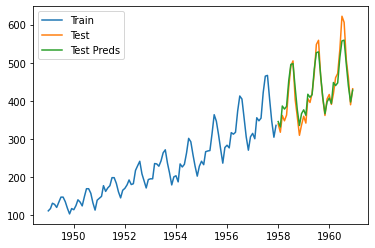

In [41]:
# Plot actual test vs. forecasts:
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(test_preds, label = 'Test Preds')
plt.legend();

Thoughts?

- 


In [42]:
train

,Number of airline passengers
Period,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1957-08-01,467.0
1957-09-01,404.0
1957-10-01,347.0


In [43]:
test_preds

Period
1958-01-01    345.964471
1958-02-01    331.731920
1958-03-01    386.787992
1958-04-01    378.774472
1958-05-01    385.777732
1958-06-01    452.776946
1958-07-01    495.777136
1958-08-01    497.777090
1958-09-01    434.777101
1958-10-01    377.777098
1958-11-01    335.777099
1958-12-01    366.777099
1959-01-01    376.741570
1959-02-01    362.509019
1959-03-01    417.565091
1959-04-01    409.551571
1959-05-01    416.554831
1959-06-01    483.554045
1959-07-01    526.554234
1959-08-01    528.554189
1959-09-01    465.554200
1959-10-01    408.554197
1959-11-01    366.554198
1959-12-01    397.554197
1960-01-01    407.518669
1960-02-01    393.286117
1960-03-01    448.342190
1960-04-01    440.328670
1960-05-01    447.331930
1960-06-01    514.331143
1960-07-01    557.331333
1960-08-01    559.331287
1960-09-01    496.331298
1960-10-01    439.331296
1960-11-01    397.331296
1960-12-01    428.331296
Freq: MS, dtype: float64

In [40]:
# Fit the best fit model from grid search SARIMAX(1, 1, 0)x(0, 1, 0, 12)
seas_arima = ARIMA(train,
                   order=(1, 1, 0),
                   seasonal_order=(0, 1, 0, 12))
res_sarima = seas_arima.fit()

# Print out summary information on the fit
print(res_sarima.summary())

                                    SARIMAX Results                                     
Dep. Variable:     Number of airline passengers   No. Observations:                  108
Model:             ARIMA(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -350.001
Date:                          Tue, 02 Aug 2022   AIC                            704.001
Time:                                  16:20:00   BIC                            709.109
Sample:                              01-01-1949   HQIC                           706.065
                                   - 12-01-1957                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.091     -2.648      0.008      -0.420      -0.063
sigma2        92.7499     13.439      6.902      0.

More gems at the end for those digging back into this notebook:

`pmdarima` has a set of tips and tricks: https://alkaline-ml.com/pmdarima/tips_and_tricks.html

Also:

- https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
- https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/

And, what I'm really looking into right now:
- https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55